<a href="https://colab.research.google.com/github/marwankashef/General-Modelling/blob/master/Fake_Account_Detection_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Relevant Packages

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install pycaret

Processing /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe/pandas_profiling-2.3.0-py2.py3-none-any.whl
  Found existing installation: pandas-profiling 2.8.0
    Uninstalling pandas-profiling-2.8.0:
      Successfully uninstalled pandas-profiling-2.8.0


## Import Libraries & Magic Commands

In [ ]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
# Import Relevant Libraries

import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import os.path
import tensorflow as tf
import seaborn as sns
from pandas_profiling import ProfileReport

import sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, recall_score, average_precision_score, roc_auc_score, accuracy_score

import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pycaret.classification import *

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE 
from sklearn import metrics

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


## Load Relevant Data

In [ ]:
# Load the data

df_train = pd.read_csv("/content/drive/My Drive/Prep/Fake Account Dataset/datasets_145755_339960_train.csv")

df_test = pd.read_csv("/content/drive/My Drive/Prep/Fake Account Dataset/datasets_145755_339960_test.csv")

## Perform EDA

In [ ]:
df_train.shape

(576, 12)

In [ ]:
df_test.shape

(120, 12)

In [ ]:
print("Percentage of missing Values \n")
print("=========================== \n")
print(df_train.isnull().sum()/df_train.shape[0]*100)

Percentage of missing Values 


profile pic             0.0
nums/length username    0.0
fullname words          0.0
nums/length fullname    0.0
name==username          0.0
description length      0.0
external URL            0.0
private                 0.0
#posts                  0.0
#followers              0.0
#follows                0.0
fake                    0.0
dtype: float64


In [ ]:
df_train.describe().transpose()

count          mean  ...     75%          max
profile pic           576.0      0.701389  ...    1.00         1.00
nums/length username  576.0      0.163837  ...    0.31         0.92
fullname words        576.0      1.460069  ...    2.00        12.00
nums/length fullname  576.0      0.036094  ...    0.00         1.00
name==username        576.0      0.034722  ...    0.00         1.00
description length    576.0     22.623264  ...   34.00       150.00
external URL          576.0      0.116319  ...    0.00         1.00
private               576.0      0.381944  ...    1.00         1.00
#posts                576.0    107.489583  ...   81.50      7389.00
#followers            576.0  85307.236111  ...  716.00  15338538.00
#follows              576.0    508.381944  ...  589.50      7500.00
fake                  576.0      0.500000  ...    1.00         1.00

[12 rows x 8 columns]

In [ ]:
df_train.head()

profile pic  nums/length username  ...  #follows  fake
0            1                  0.27  ...       955     0
1            1                  0.00  ...       533     0
2            1                  0.10  ...        98     0
3            1                  0.00  ...       651     0
4            1                  0.00  ...       126     0

[5 rows x 12 columns]

In [ ]:
for col in df_train:
  print(col)

profile pic
nums/length username
fullname words
nums/length fullname
name==username
description length
external URL
private
#posts
#followers
#follows
fake


In [ ]:
for col in df_train:
    print(str(col) + '\n' + str(df_train[col].unique()))

profile pic
[1 0]
nums/length username
[0.27 0.   0.1  0.29 0.13 0.18 0.33 0.12 0.19 0.2  0.06 0.44 0.24 0.14
 0.36 0.22 0.08 0.15 0.09 0.45 0.38 0.11 0.17 0.31 0.3  0.07 0.43 0.5
 0.25 0.57 0.88 0.55 0.8  0.4  0.41 0.67 0.89 0.16 0.58 0.64 0.42 0.21
 0.71 0.83 0.47 0.91 0.28 0.54 0.46 0.73 0.6  0.86 0.62 0.92]
fullname words
[ 0  2  1  4  3  6 12  5 10]
nums/length fullname
[0.   0.12 0.1  0.08 0.24 0.25 0.33 0.14 0.22 0.43 0.4  0.36 0.29 0.11
 0.31 0.89 0.2  0.38 0.27 0.44 1.   0.5  0.18 0.57 0.46]
name==username
[0 1]
description length
[ 53  44   0  82  81  50  71  40  54 103  98  46  48  63 106  35  30  27
 109 132 126 122 138  56   9 134   2  23  93   4   1  91  57 108  12   3
  39  68 129  64  42  70  74   8  28  18  36  11  29  24  21  34  59  15
  16  73  26  55 140 113  38  89 123  33   5 150 149 148  19 133  43  37
  87  95 117  58  62 137  14 131  10  72  51  13 105  67  20  86  96  17
  61 112 101  32  80 146   6  49 120  25 139  31   7  22]
external URL
[0 1]
private
[0 1

In [ ]:
df_train.select_dtypes(include=['number'])

profile pic  nums/length username  ...  #follows  fake
0              1                  0.27  ...       955     0
1              1                  0.00  ...       533     0
2              1                  0.10  ...        98     0
3              1                  0.00  ...       651     0
4              1                  0.00  ...       126     0
..           ...                   ...  ...       ...   ...
571            1                  0.55  ...       596     1
572            1                  0.38  ...        75     1
573            1                  0.57  ...       339     1
574            1                  0.57  ...        73     1
575            1                  0.27  ...       487     1

[576 rows x 12 columns]

In [ ]:
df_train.select_dtypes(include=['object'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[576 rows x 0 columns]

1    288
0    288
Name: fake, dtype: int64


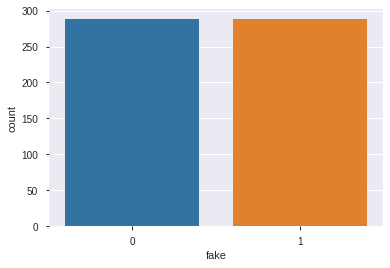

In [ ]:
target = df_train['fake']
ax = sns.countplot(x=target, data=df_train)
print(target.value_counts())

<Figure size 1080x720 with 0 Axes>

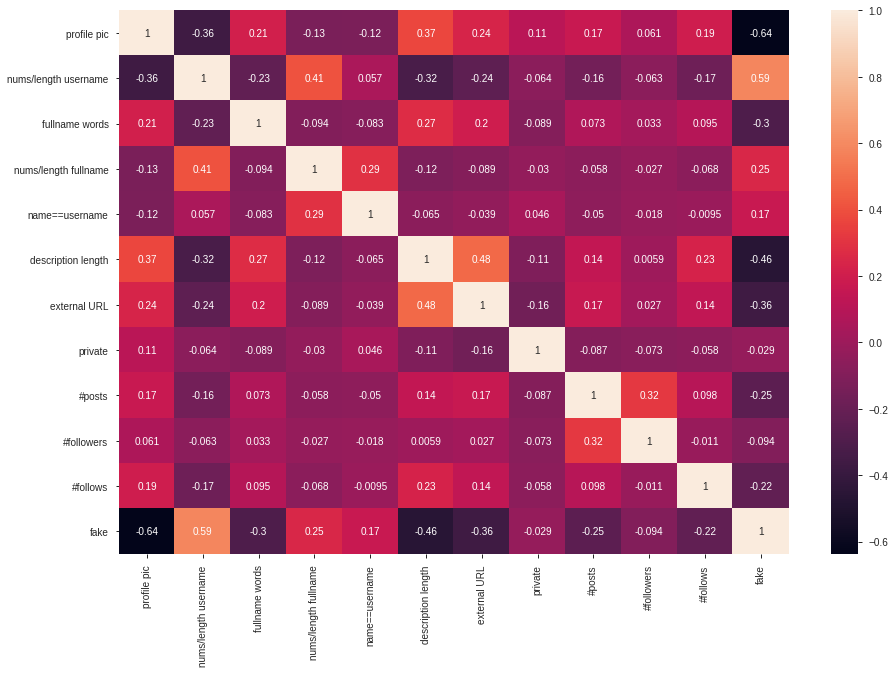

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

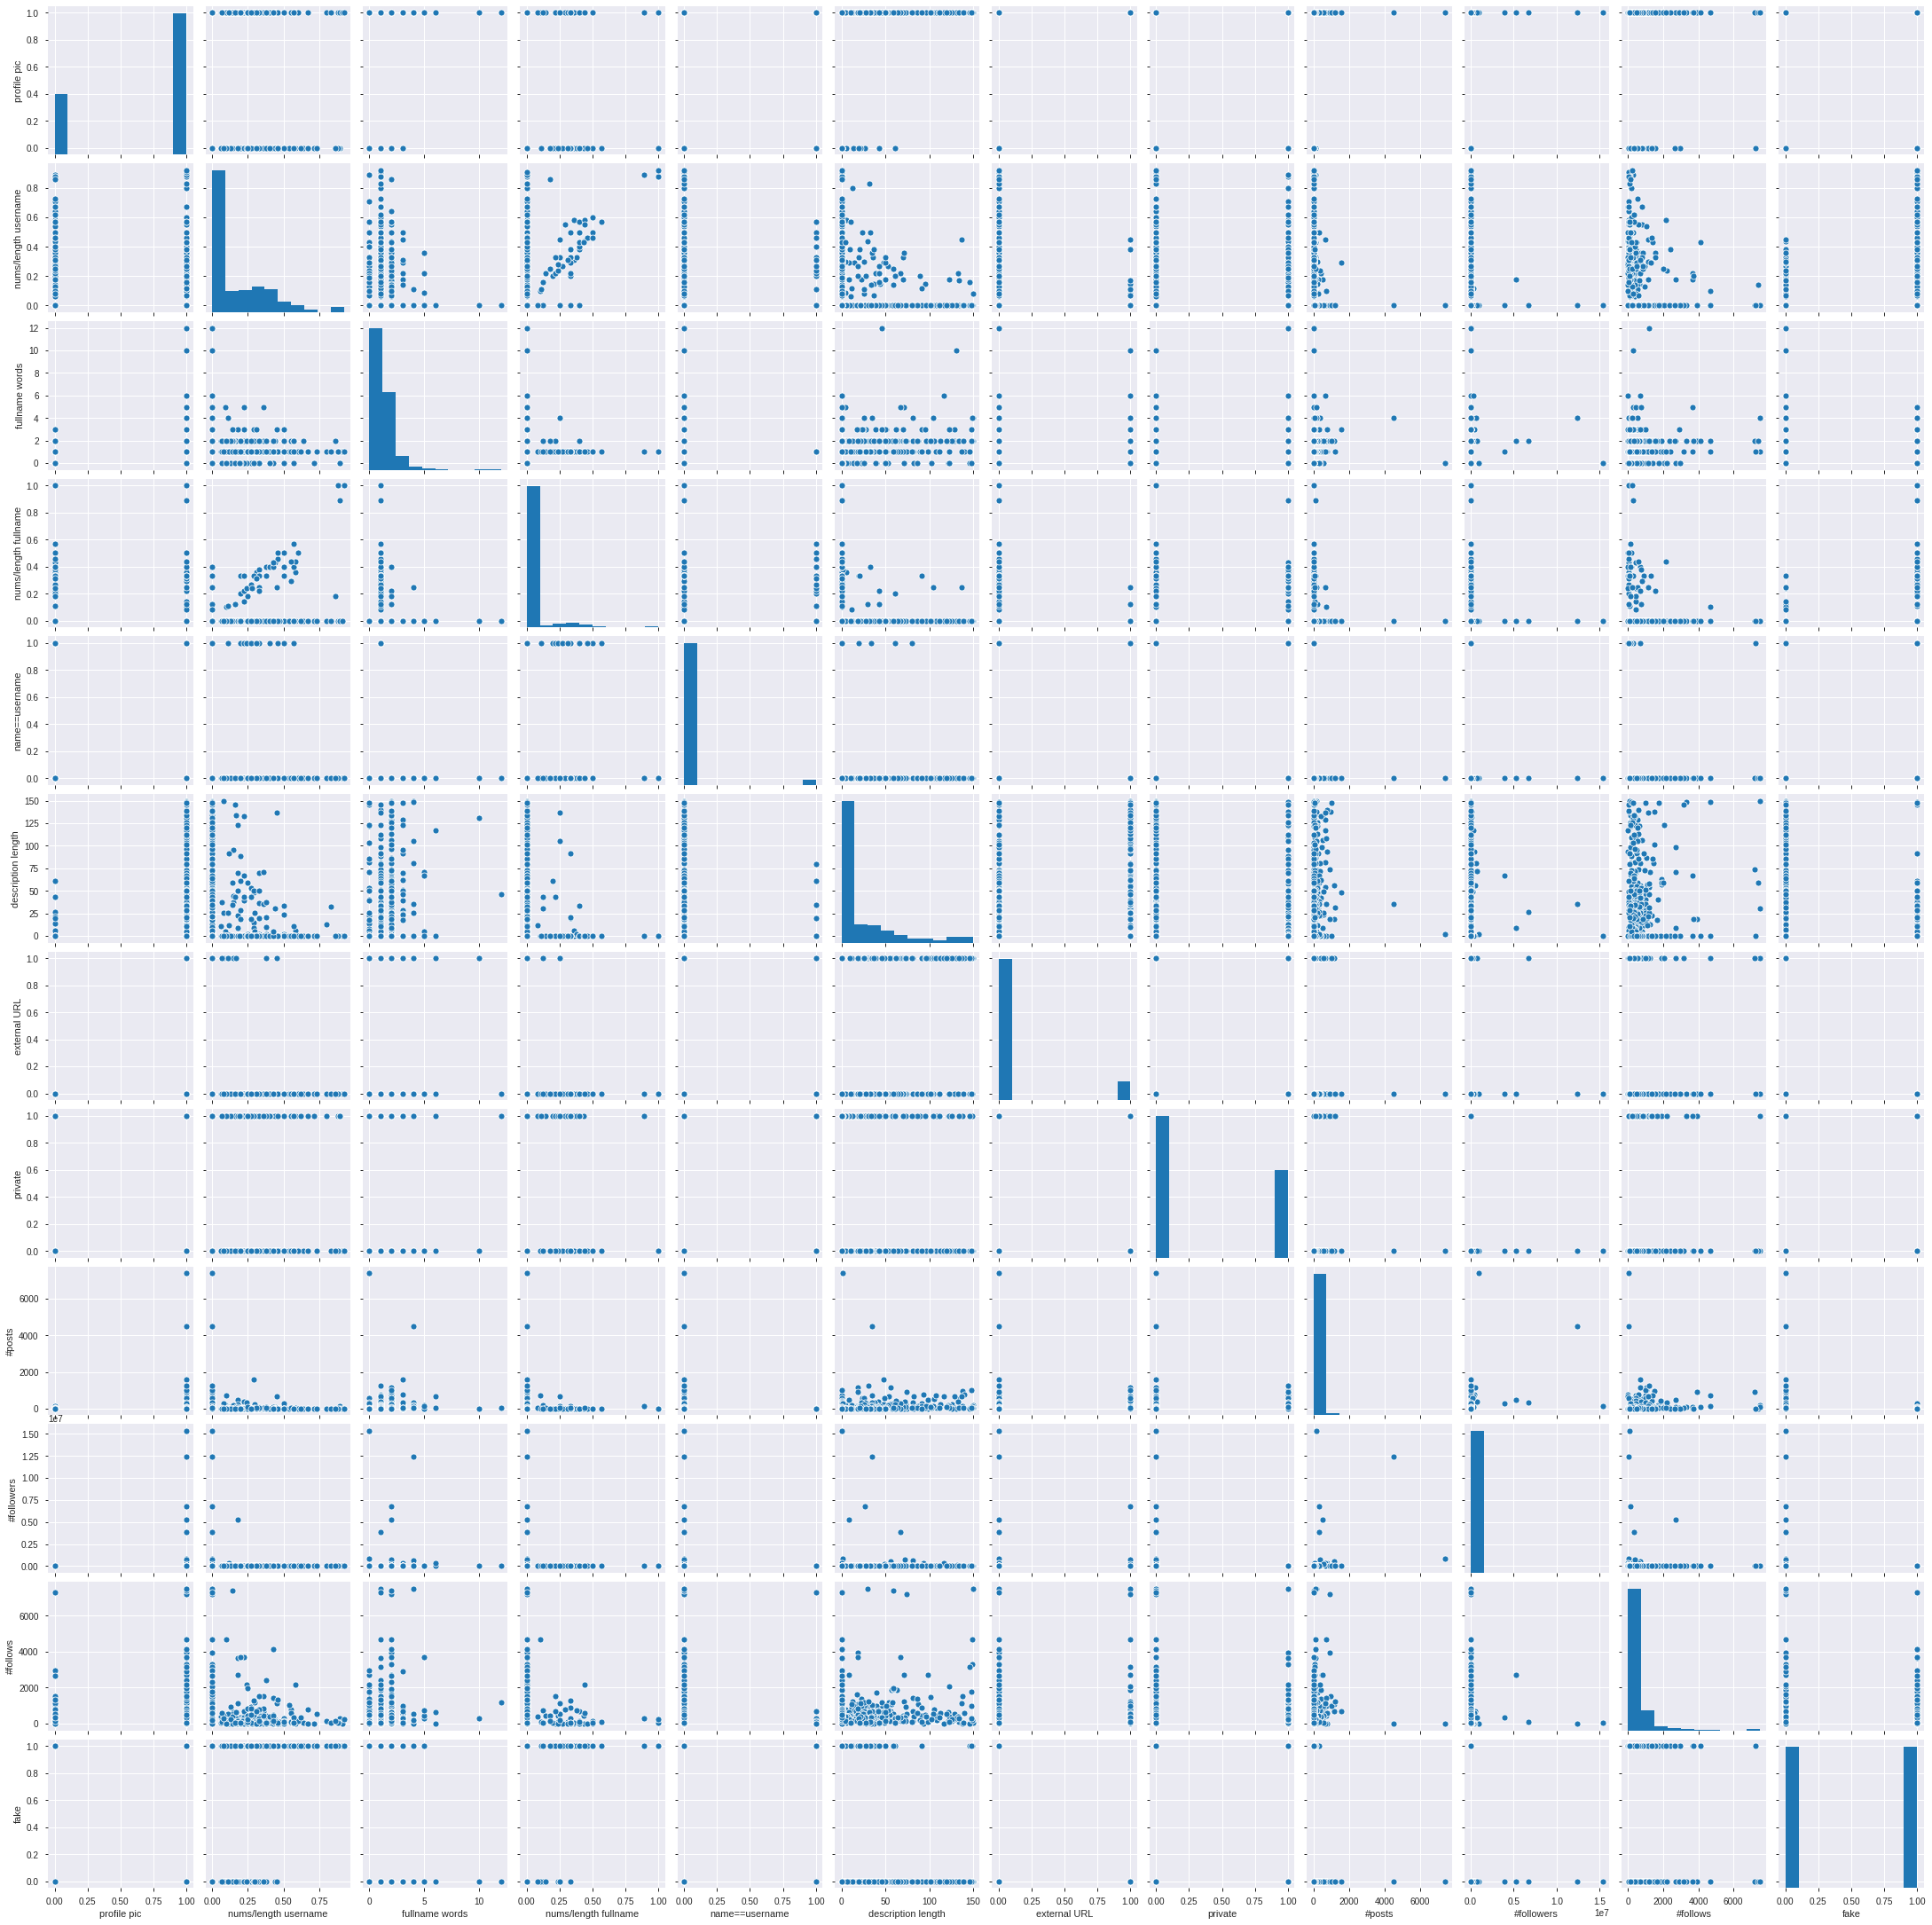

In [ ]:
sns.pairplot(df_train)

## Pre-processing

In [ ]:
df_train = df_train.replace(np.nan,0)

## Split Data into X and y

In [ ]:
X = df_train.drop(['fake'],axis=1)

In [ ]:
X = df_train

In [ ]:
X.head()

profile_pic  nums/length_username  ...  #follows  fake
0            1                  0.27  ...       955     0
1            1                  0.00  ...       533     0
2            1                  0.10  ...        98     0
3            1                  0.00  ...       651     0
4            1                  0.00  ...       126     0

[5 rows x 12 columns]

In [ ]:
y = df_train['fake']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape
y_train.shape
X_test.shape
y_test.shape

(460, 12)

(460,)

(116, 12)

(116,)

In [ ]:
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(460, 12)

(460,)

(116, 12)

(116,)

##Vanilla Model Creation for Intuition

In [ ]:
data = df_train.sample(frac=0.80, random_state=786).reset_index(drop=True)
data_unseen = df_train.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (461, 12)
Unseen Data For Predictions: (115, 12)


In [ ]:
exp_clf101 = setup(data = data, 
                   target = 'fake', 
                   session_id=123,
                   normalize = True,
                   #remove_multicollinearity = True,
                   #remove_outliers = True,
                   #outliers_threshold = 0.05,
                   #multicollinearity_threshold=0.90,                   
                   ) 

 
Setup Succesfully Completed!


In [ ]:
compare_models(blacklist=['knn'])

In [ ]:
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8485  0.9485  0.8125  0.8667  0.8387  0.6961
1       0.9394  0.9926  0.8824  1.0000  0.9375  0.8791
2       0.9062  0.9414  1.0000  0.8421  0.9143  0.8125
3       0.9375  0.9609  0.8750  1.0000  0.9333  0.8750
4       0.9375  0.9961  1.0000  0.8889  0.9412  0.8750
5       0.9375  0.9922  1.0000  0.8889  0.9412  0.8750
6       0.9062  0.9844  0.8125  1.0000  0.8966  0.8125
7       0.9375  0.9688  0.8750  1.0000  0.9333  0.8750
8       0.9688  1.0000  1.0000  0.9412  0.9697  0.9375
9       0.9375  0.9844  0.9375  0.9375  0.9375  0.8750
Mean    0.9257  0.9769  0.9195  0.9365  0.9243  0.8513
SD      0.0308  0.0197  0.0738  0.0587  0.0337  0.0617

In [ ]:
tuned_lightgbm = tune_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9091  0.9632  0.9375  0.8824  0.9091  0.8183
1       0.9394  0.9669  0.8824  1.0000  0.9375  0.8791
2       0.8750  0.9414  0.9375  0.8333  0.8824  0.7500
3       0.9062  0.9805  0.8750  0.9333  0.9032  0.8125
4       0.9688  1.0000  1.0000  0.9412  0.9697  0.9375
5       0.9375  0.9961  0.9375  0.9375  0.9375  0.8750
6       0.9062  0.9727  0.8125  1.0000  0.8966  0.8125
7       0.9375  0.9688  0.9375  0.9375  0.9375  0.8750
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9375  0.9883  0.9375  0.9375  0.9375  0.8750
Mean    0.9317  0.9778  0.9257  0.9403  0.9311  0.8635
SD      0.0335  0.0179  0.0539  0.0506  0.0335  0.0670

In [ ]:
#tuned_rf optimize parameter set to the default 'Accuracy'
plot_model(tuned_lightgbm, plot = 'parameter')

Parameters
boosting_type           gbdt
class_weight            None
colsample_bytree           1
importance_type        split
learning_rate            0.2
max_depth                 70
min_child_samples         20
min_child_weight       0.001
min_split_gain           0.6
n_estimators             170
n_jobs                    -1
num_leaves               150
objective               None
random_state             123
reg_alpha                0.1
reg_lambda               0.8
silent                  True
subsample                  1
subsample_for_bin     200000
subsample_freq             0

## Model Creation

Random Forest

In [ ]:
#making the instance
rf = RandomForestClassifier(random_state=42)
#learning
rf.fit(X_train,y_train)
#Prediction
y_pred = rf.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[63  0]
 [ 0 53]]


In [ ]:
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

print('\nClassification Report:')
print(metrics.classification_report(y_test, y_pred))

Test Accuracy:  1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        53

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



In [ ]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
# Setup the pipeline

steps_rf = [('scaler', RobustScaler()),
            ('RF', RandomForestClassifier())];

pipeline_rf = Pipeline(steps_rf);

parameters_rf = {'RF__criterion':['gini','entropy'],
 'RF__n_estimators':[5,10,15,20,25,30],
 'RF__max_depth': [5, 10, 15, 20, 30, 40, 50],
 'RF__max_leaf_nodes': [5, 20, 100],
 'RF__min_samples_leaf':[1,2,3],
 'RF__min_samples_split':[3,4,5,6,7],
 'RF__random_state':[42],
 'RF__n_jobs':[-1]}

# Instantiate the GridSearchCV object: cv
cv_rf = RandomizedSearchCV(pipeline_rf, parameters_rf, cv=10, scoring = 'accuracy',random_state=123);
# Fit to the training set
cv_rf.fit(X_train,y_train);

# Predict the labels of the test set: y_pred
y_pred_rf = cv_rf.predict(X_test);
# Print model parameters
print("Tuned Model Parameters: {}".format(cv_rf.best_params_))

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              RobustScaler(copy=True,
                                                           quantile_range=(25.0,
                                                                           75.0),
                                                           with_centering=True,
                                                           with_scaling=True)),
                                             ('RF',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                             

Tuned Model Parameters: {'RF__random_state': 42, 'RF__n_jobs': -1, 'RF__n_estimators': 30, 'RF__min_samples_split': 5, 'RF__min_samples_leaf': 1, 'RF__max_leaf_nodes': 100, 'RF__max_depth': 40, 'RF__criterion': 'entropy'}


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_rf))

[[63  0]
 [ 0 53]]


In [ ]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        53

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



In [ ]:
df_test

profile pic  nums/length username  ...  #follows  fake
0              1                  0.33  ...       604     0
1              1                  0.00  ...         6     0
2              1                  0.00  ...       668     0
3              1                  0.00  ...      7369     0
4              1                  0.50  ...       356     0
..           ...                   ...  ...       ...   ...
115            1                  0.29  ...       811     1
116            1                  0.40  ...       164     1
117            1                  0.00  ...      3572     1
118            0                  0.17  ...      1695     1
119            1                  0.44  ...        68     1

[120 rows x 12 columns]

In [ ]:
df_test = df_test.replace(np.nan,0)

In [ ]:
predictions = cv_rf.predict(df_test)

In [ ]:
output = pd.DataFrame({'Response': predictions})
output.to_csv('predictions', index = False)
output

Response
0           1
1           1
2           1
3           1
4           1
..        ...
115         1
116         1
117         1
118         1
119         1

[120 rows x 1 columns]